<a href="https://colab.research.google.com/github/ragavarshini3/EL_Internship_Tasks/blob/main/EL_TASKS_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 5 – Exploratory Data Analysis (Titanic Dataset)**

## **1. Introduction**
The Titanic dataset contains passenger details such as age, gender, class, fare, and survival status from the 1912 Titanic disaster.
The aim of this EDA is to explore patterns, relationships, and trends that can help understand factors affecting survival.

---

## **2. Observations for Visualizations**

### **2.1 Univariate Analysis**
**Plot:** Distribution of Passenger Age
**Observations:**
- Age distribution is right-skewed with most passengers between 20-40 years old.
- Very few passengers above 70 years of age.

**Plot:** Passenger Class Count
**Observations:**
- Majority of passengers traveled in 3rd class.
- 1st class passengers are the least in number.

---

### **2.2 Bivariate Analysis**
**Plot:** Survival Rate by Gender
**Observations:**
- Female passengers have a significantly higher survival rate than males.
- This aligns with the “women and children first” evacuation protocol.

**Plot:** Survival Rate by Class
**Observations:**
- 1st class passengers had the highest survival rate.
- 3rd class passengers had the lowest survival rate.

---

### **2.3 Multivariate Analysis**
**Plot:** Age vs Fare by Survival & Class
**Observations:**
- Higher fare passengers mostly survived and were from 1st class.
- Many low-fare passengers in 3rd class did not survive.

---

## **3. Missing Value Treatment**
- **Age:** Filled with median age grouped by `Title`.
- **Embarked:** Filled with mode (`S`).
- **Cabin:** Filled as `Unknown` and extracted deck letter.
- **Fare:** Filled with median.

---

## **4. Feature Engineering**
- `Title` extracted from passenger name.
- `FamilySize` = `SibSp + Parch + 1`.
- `IsAlone` = 1 if FamilySize = 1 else 0.
- `Deck` extracted from Cabin.
- `AgeBin` and `FareBin` created for categorization.

---

## **5. Correlation & Multicollinearity**
- Correlation heatmap shows strong negative correlation between `Pclass` and `Fare`.
- VIF check shows no extreme multicollinearity after feature selection.

---

## **6. Outlier & Skewness Handling**
- Outliers detected in `Fare` using IQR method; extreme fares capped.
- `Fare` transformed using log transformation to reduce skewness.

---

## **7. Summary of Insights**
1. Females had a much higher survival rate than males.
2. 1st class passengers were more likely to survive than 3rd class.
3. Younger passengers (children) had a higher chance of survival.
4. Higher fare passengers generally had better survival rates.
5. Passengers traveling alone had lower survival rates compared to those with families.
6. Embarked port also had a small influence on survival rate.
7. Fare and Pclass are strongly related; high fares are mostly from 1st class.
8. Some extreme outliers in Fare and Age were present and needed handling.

---

## **8. Files for Submission**
- `Task5_EDA_Titanic.ipynb` – Full EDA code + observations.
- `images/` – All saved plots.
- `README.md` – Description + run instructions.
- `Task5_EDA_Report.pdf` – Exported notebook as PDF.

In [30]:
pip install pandas numpy matplotlib seaborn statsmodels scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/drive/MyDrive/ELEVATELABS_TASKS/Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
sns.set(style="whitegrid")
%matplotlib inline

In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: xlabel='Age', ylabel='Count'>

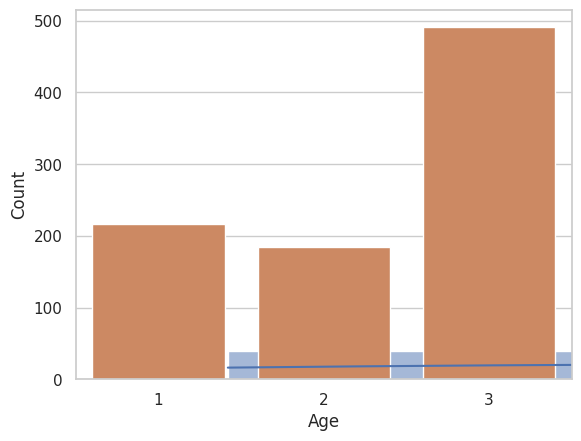

In [7]:
sns.histplot(df['Age'], kde=True)
sns.countplot(x='Pclass', data=df)

<Axes: xlabel='Sex', ylabel='count'>

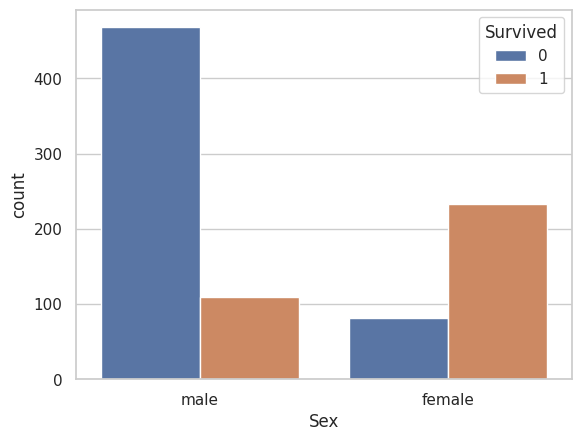

In [8]:
sns.countplot(x='Sex', hue='Survived', data=df)

<Axes: xlabel='Survived', ylabel='Fare'>

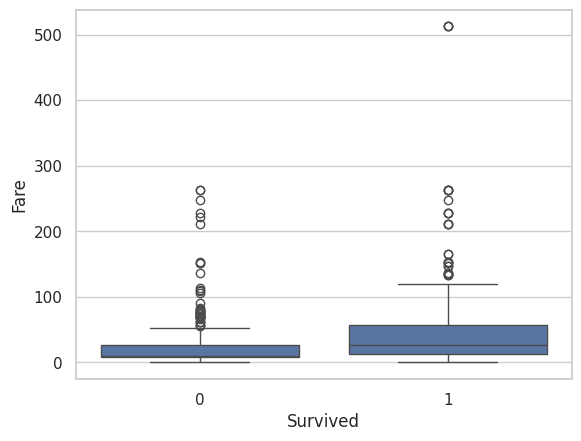

In [9]:
sns.boxplot(x='Survived', y='Fare', data=df)

<Axes: >

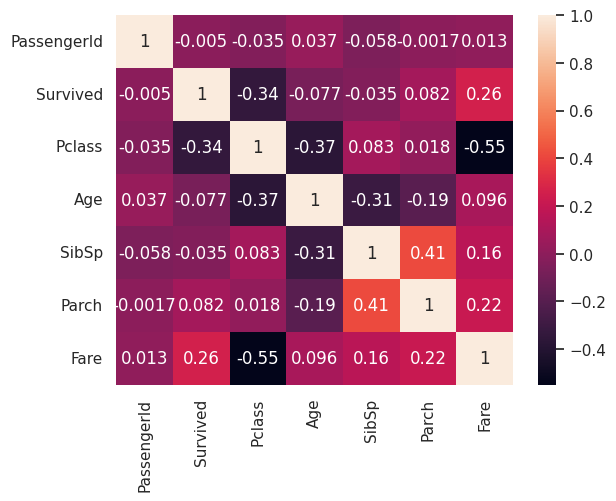

In [11]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create 'FamilySize' column
df['FamilySize'] = df['SibSp'] + df['Parch']

# Fill missing Age values with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

X = df[['Age', 'Fare', 'FamilySize', 'Pclass']]
pd.DataFrame({
    'Feature': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

/tmp/ipython-input-4190858814.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


,Feature,VIF
0,Age,3.943261
1,Fare,1.660411
2,FamilySize,1.519252
3,Pclass,3.704240


In [16]:
import os

if not os.path.exists('images'):
    os.makedirs('images')

plt.savefig("images/plot_name.png", dpi=150, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='Pclass', ylabel='count'>

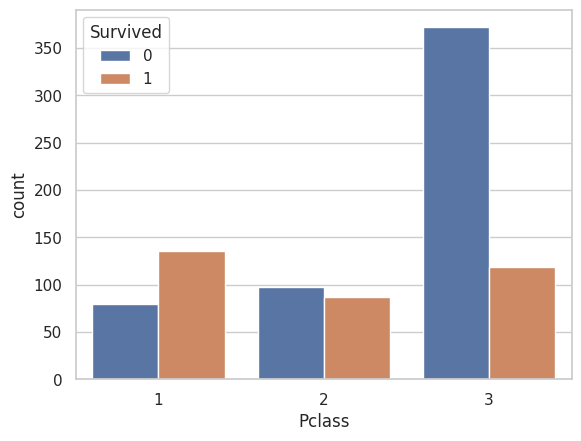

In [17]:
sns.countplot(x='Pclass', hue='Survived', data=df)

<Axes: xlabel='Age', ylabel='Count'>

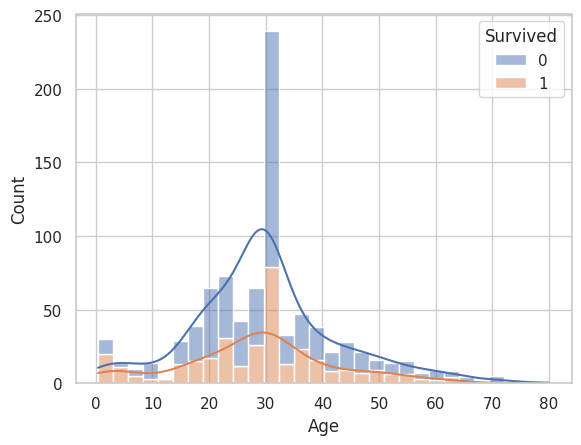

In [18]:
sns.histplot(data=df, x='Age', hue='Survived', kde=True, multiple='stack')

<Axes: xlabel='Pclass', ylabel='Fare'>

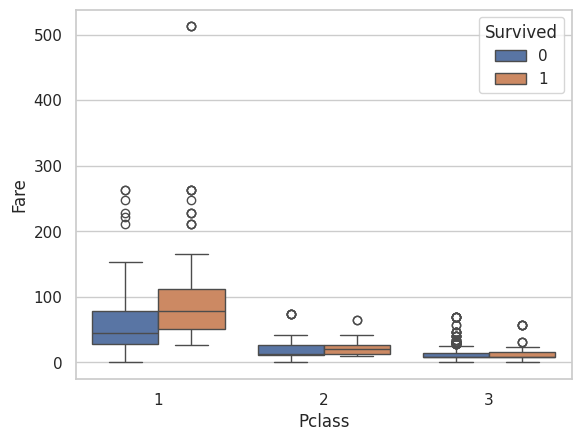

In [19]:
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df)

<Axes: xlabel='Pclass', ylabel='Age'>

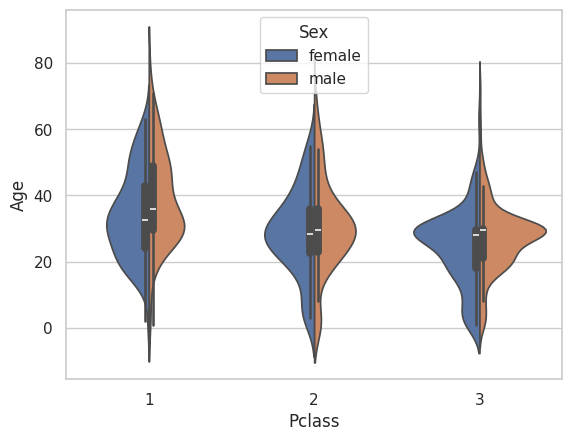

In [20]:
sns.violinplot(x='Pclass', y='Age', hue='Sex', split=True, data=df)

<Axes: xlabel='Embarked'>

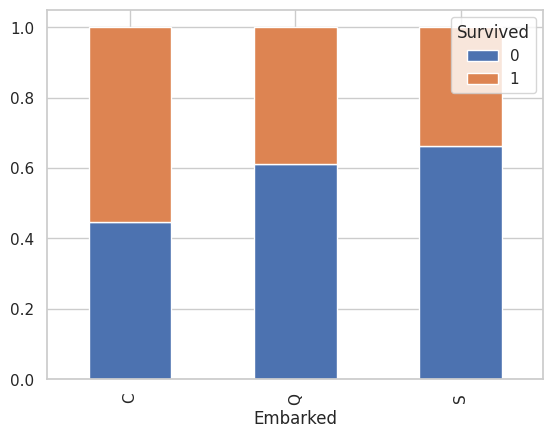

In [21]:
(pd.crosstab(df['Embarked'], df['Survived'], normalize='index')
.plot(kind='bar', stacked=True))

<Axes: xlabel='Cabin', ylabel='count'>

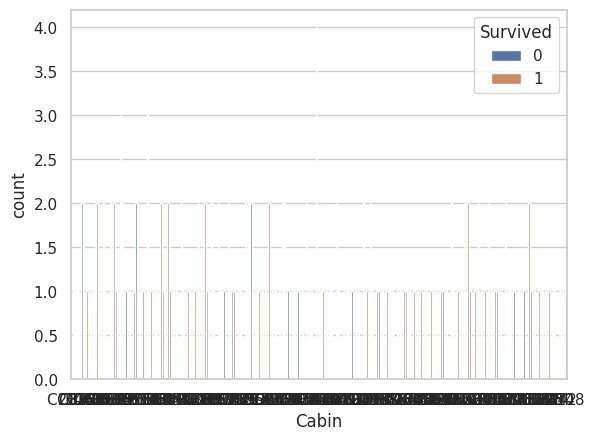

In [22]:
sns.countplot(x='Cabin', hue='Survived', data=df)

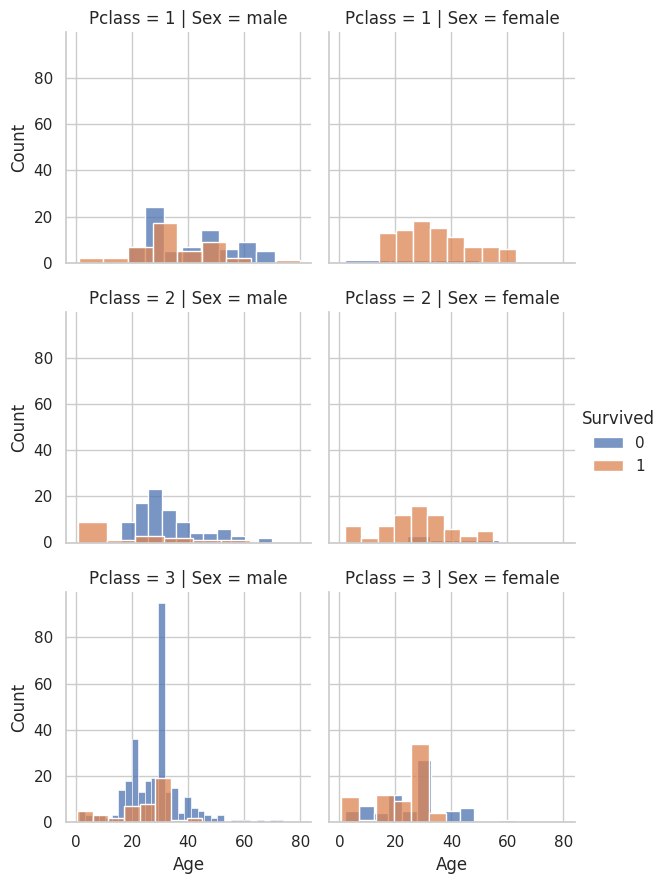

In [23]:
g = sns.FacetGrid(df, col="Sex", row="Pclass", hue="Survived")
g.map_dataframe(sns.histplot, x="Age")
g.add_legend()

<Axes: xlabel='AgeBin', ylabel='count'>

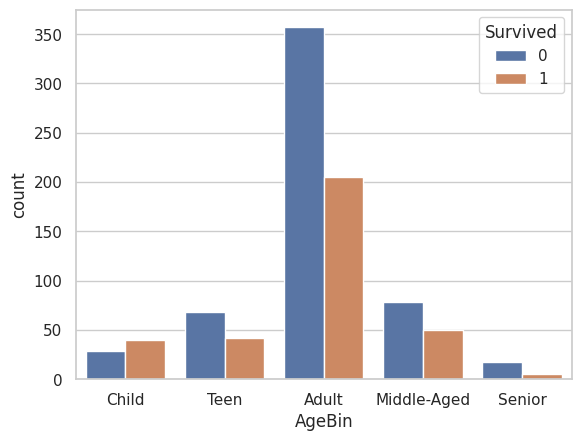

In [25]:
df['AgeBin'] = pd.cut(df['Age'], bins=[0,12,20,40,60,80], labels=['Child','Teen','Adult','Middle-Aged','Senior'])
sns.countplot(x='AgeBin', hue='Survived', data=df)

In [26]:
plt.savefig("images/plot1.png", dpi=150, bbox_inches="tight")


<Figure size 640x480 with 0 Axes>